In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
### Initial imports
import logging
import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as T
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

logging.basicConfig(level=logging.INFO)
log = logging.getLogger(__name__)

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from epimodel.pymc3_models import cm_effect
from epimodel.pymc3_models.cm_effect.datapreprocessor import DataPreprocessor

%matplotlib inline

In [5]:
dp = DataPreprocessor(drop_HS=True)
data = dp.preprocess_data("data_final.csv")

INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Dropping Healthcare Infection Control
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Smoothing
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Albania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Andorra
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Estonia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Iceland
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Latvia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Lithuania
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing New Zealand
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Singapore
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Skipping smoothing Slovakia
INFO:epimodel.pymc3_models.cm_effect.datapreprocessor:Performing Masking


In [6]:
# def mask_region_ends(d, region, ndays=10):
#     i = d.Rs.index(region)
#     d.Active.mask[i,-ndays:] = True
#     d.Confirmed.mask[i,-ndays:] = True
#     d.Deaths.mask[i,-ndays:] = True
#     d.NewDeaths.mask[i,-ndays:] = True
#     d.NewCases.mask[i,-ndays:] = True

# for region in data.Rs:
#     mask_region_ends(data, region, 7)

In [7]:
with cm_effect.models.CMDeath_Final(data) as model:
    model.build_model()

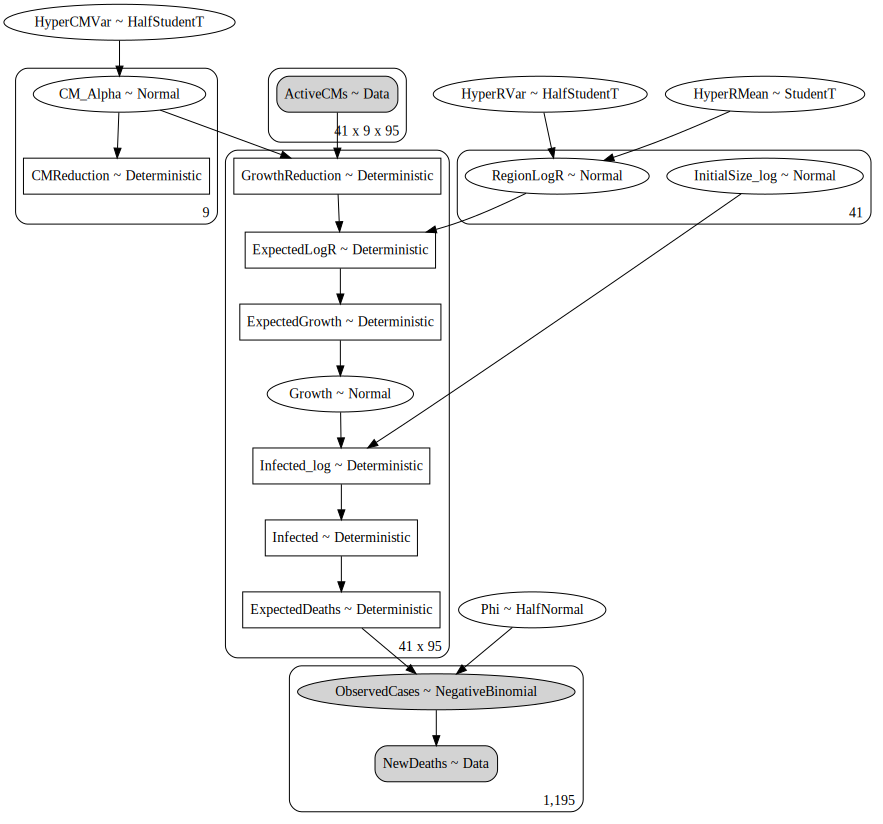

In [8]:
pm.model_to_graphviz(model).render("model-death-final")
pm.model_to_graphviz(model)

In [9]:
with model.model:
    model.trace = pm.sample(2000, chains=4, target_accept=0.95)
    
np.savetxt("death2205.txt", model.trace["CMReduction"])

Auto-assigning NUTS sampler...
INFO:pymc3:Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
INFO:pymc3:Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
INFO:pymc3:Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Phi, InitialSize_log, Growth, RegionLogR, HyperRVar, HyperRMean, CM_Alpha, HyperCMVar]
INFO:pymc3:NUTS: [Phi, InitialSize_log, Growth, RegionLogR, HyperRVar, HyperRMean, CM_Alpha, HyperCMVar]
Sampling 4 chains, 0 divergences: 100%|██████████| 10000/10000 [1:06:54<00:00,  2.49draws/s]
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
INFO:pymc3:The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.
ERROR:pymc3:The estimated number of effective samples is smaller than 200 for some parameters.


In [16]:
ess = pm.stats.ess(model.trace, relative=True)

In [19]:
ess

<xarray.Dataset>
Dimensions:                (CMReduction_dim_0: 9, CM_Alpha_dim_0: 9, ExpectedDeaths_dim_0: 41, ExpectedDeaths_dim_1: 95, ExpectedGrowth_dim_0: 41, ExpectedGrowth_dim_1: 95, ExpectedLogR_dim_0: 41, ExpectedLogR_dim_1: 95, GrowthReduction_dim_0: 41, GrowthReduction_dim_1: 95, Growth_dim_0: 41, Growth_dim_1: 95, Infected_dim_0: 41, Infected_dim_1: 95, Infected_log_dim_0: 41, Infected_log_dim_1: 95, InitialSize_log_dim_0: 41, RegionLogR_dim_0: 41)
Coordinates:
  * CM_Alpha_dim_0         (CM_Alpha_dim_0) int64 0 1 2 3 4 5 6 7 8
  * RegionLogR_dim_0       (RegionLogR_dim_0) int64 0 1 2 3 4 ... 36 37 38 39 40
  * Growth_dim_0           (Growth_dim_0) int64 0 1 2 3 4 5 ... 36 37 38 39 40
  * Growth_dim_1           (Growth_dim_1) int64 0 1 2 3 4 5 ... 90 91 92 93 94
  * InitialSize_log_dim_0  (InitialSize_log_dim_0) int64 0 1 2 3 ... 37 38 39 40
  * CMReduction_dim_0      (CMReduction_dim_0) int64 0 1 2 3 4 5 6 7 8
  * GrowthReduction_dim_0  (GrowthReduction_dim_0) int64 0 1 2 3 ... 37 38 39 40
  * GrowthReduction_dim_1  (GrowthReduction_dim_1) int64 0 1 2 3 ... 91 92 93 94
  * ExpectedLogR_dim_0     (ExpectedLogR_dim_0) int64 0 1 2 3 4 ... 37 38 39 40
  * ExpectedLogR_dim_1     (ExpectedLogR_dim_1) int64 0 1 2 3 4 ... 91 92 93 94
  * ExpectedGrowth_dim_0   (ExpectedGrowth_dim_0) int64 0 1 2 3 ... 37 38 39 40
  * ExpectedGrowth_dim_1   (ExpectedGrowth_dim_1) int64 0 1 2 3 ... 91 92 93 94
  * Infected_log_dim_0     (Infected_log_dim_0) int64 0 1 2 3 4 ... 37 38 39 40
  * Infected_log_dim_1     (Infected_log_dim_1) int64 0 1 2 3 4 ... 91 92 93 94
  * Infected_dim_0         (Infected_dim_0) int64 0 1 2 3 4 5 ... 36 37 38 39 40
  * Infected_dim_1         (Infected_dim_1) int64 0 1 2 3 4 5 ... 90 91 92 93 94
  * ExpectedDeaths_dim_0   (ExpectedDeaths_dim_0) int64 0 1 2 3 ... 37 38 39 40
  * ExpectedDeaths_dim_1   (ExpectedDeaths_dim_1) int64 0 1 2 3 ... 91 92 93 94
Data variables:
    CM_Alpha               (CM_Alpha_dim_0) float64 181.4 208.7 ... 311.4 224.4
    HyperRMean             float64 83.14
    RegionLogR             (RegionLogR_dim_0) float64 299.6 215.3 ... 1.477e+03
    Growth                 (Growth_dim_0, Growth_dim_1) float64 748.8 ... 8.717e+03
    InitialSize_log        (InitialSize_log_dim_0) float64 294.0 ... 1.229e+03
    HyperCMVar             float64 1.533e+03
    CMReduction            (CMReduction_dim_0) float64 181.4 208.7 ... 224.4
    HyperRVar              float64 126.6
    GrowthReduction        (GrowthReduction_dim_0, GrowthReduction_dim_1) float64 8e+03 ... 145.7
    ExpectedLogR           (ExpectedLogR_dim_0, ExpectedLogR_dim_1) float64 299.6 ... 282.8
    ExpectedGrowth         (ExpectedGrowth_dim_0, ExpectedGrowth_dim_1) float64 299.6 ... 282.8
    Infected_log           (Infected_log_dim_0, Infected_log_dim_1) float64 294.3 ... 1.263e+03
    Infected               (Infected_dim_0, Infected_dim_1) float64 294.3 ... 1.263e+03
    ExpectedDeaths         (ExpectedDeaths_dim_0, ExpectedDeaths_dim_1) float64 8e+03 ... 5.576e+03
    Phi                    float64 5.891e+03

In [12]:
model.trace.varnames

['HyperCMVar_log__',
 'CM_Alpha',
 'HyperRMean',
 'HyperRVar_log__',
 'RegionLogR',
 'Growth',
 'InitialSize_log',
 'Phi_log__',
 'HyperCMVar',
 'CMReduction',
 'HyperRVar',
 'GrowthReduction',
 'ExpectedLogR',
 'ExpectedGrowth',
 'Infected_log',
 'Infected',
 'ExpectedDeaths',
 'Phi']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x133fce8d0>,
      dtype=object)

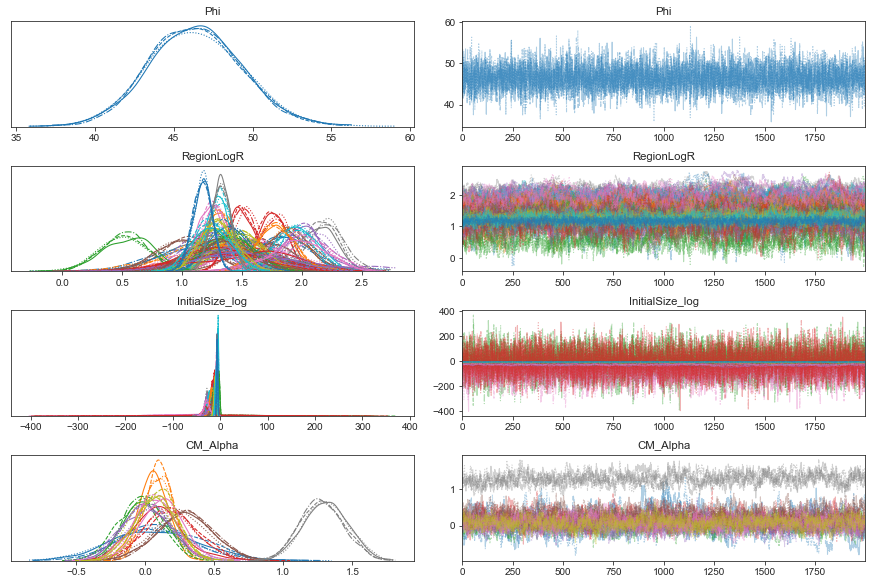

In [13]:
pm.traceplot(model.trace, ["Phi", "RegionLogR", "InitialSize_log", "CM_Alpha"])

In [11]:
np.savetxt("death2305.txt", model.trace["CMReduction"])

INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 23-05;19-44
INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 23-05;19-44


ValueError: lam value too large

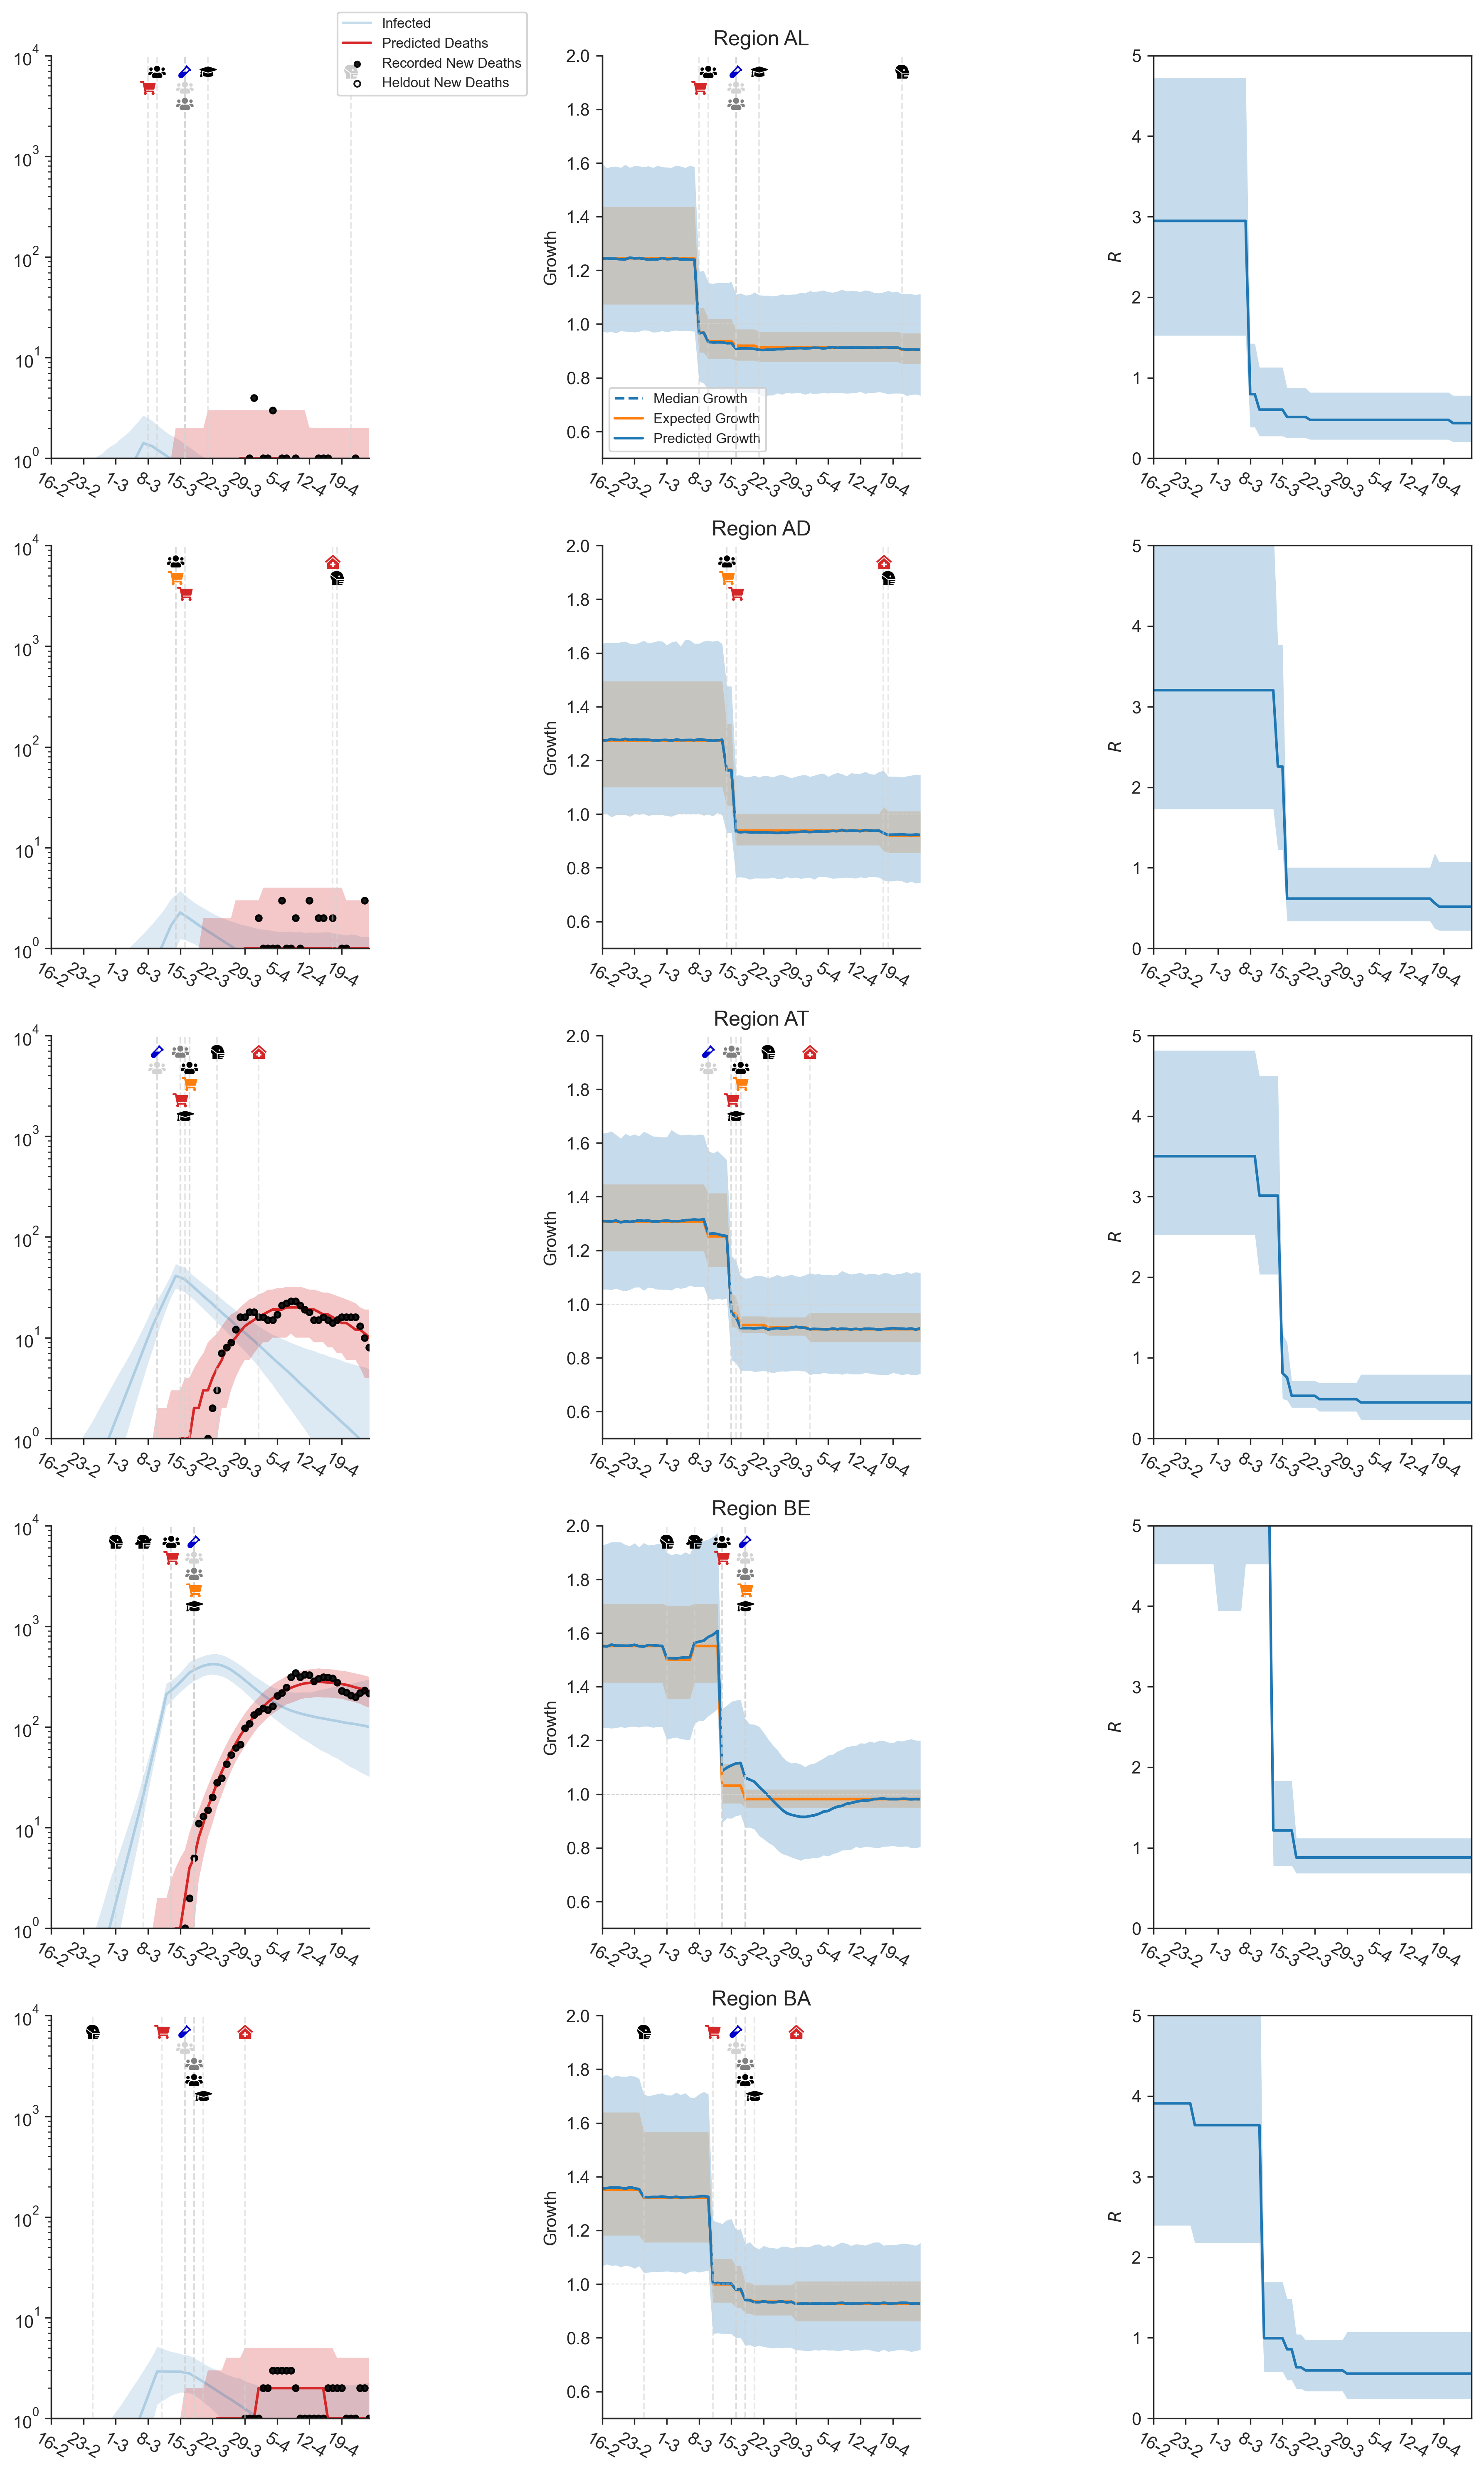

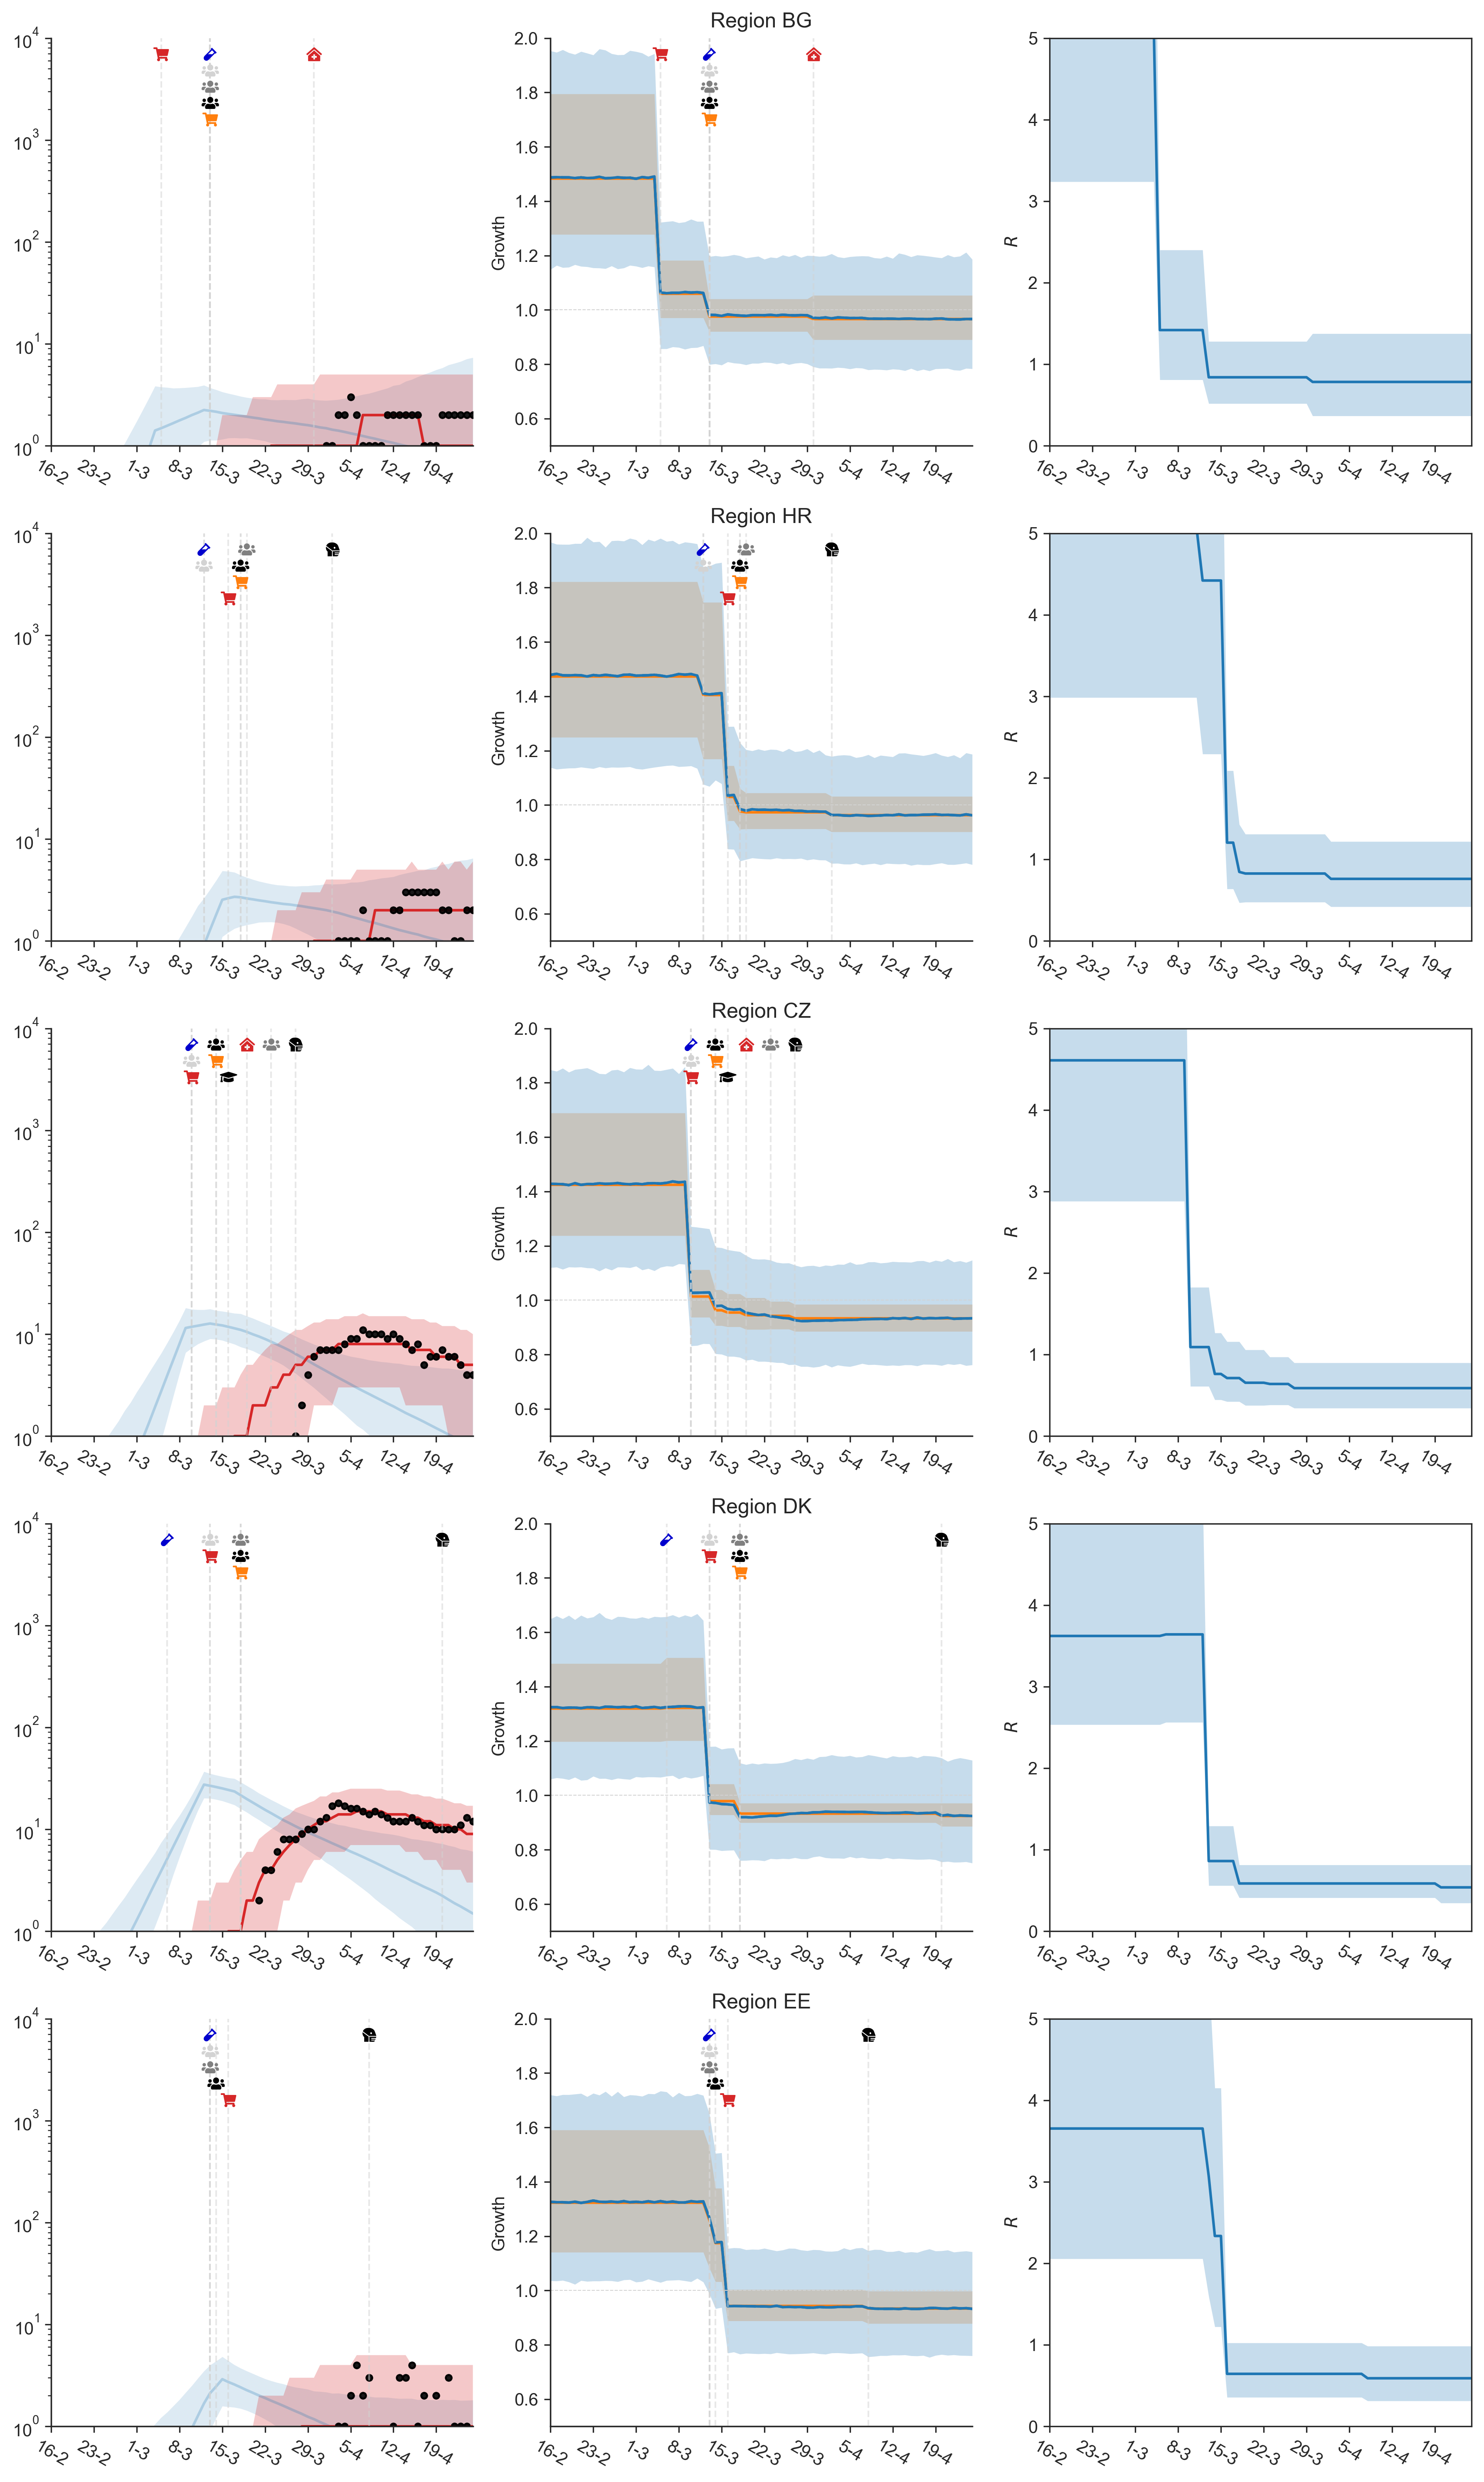

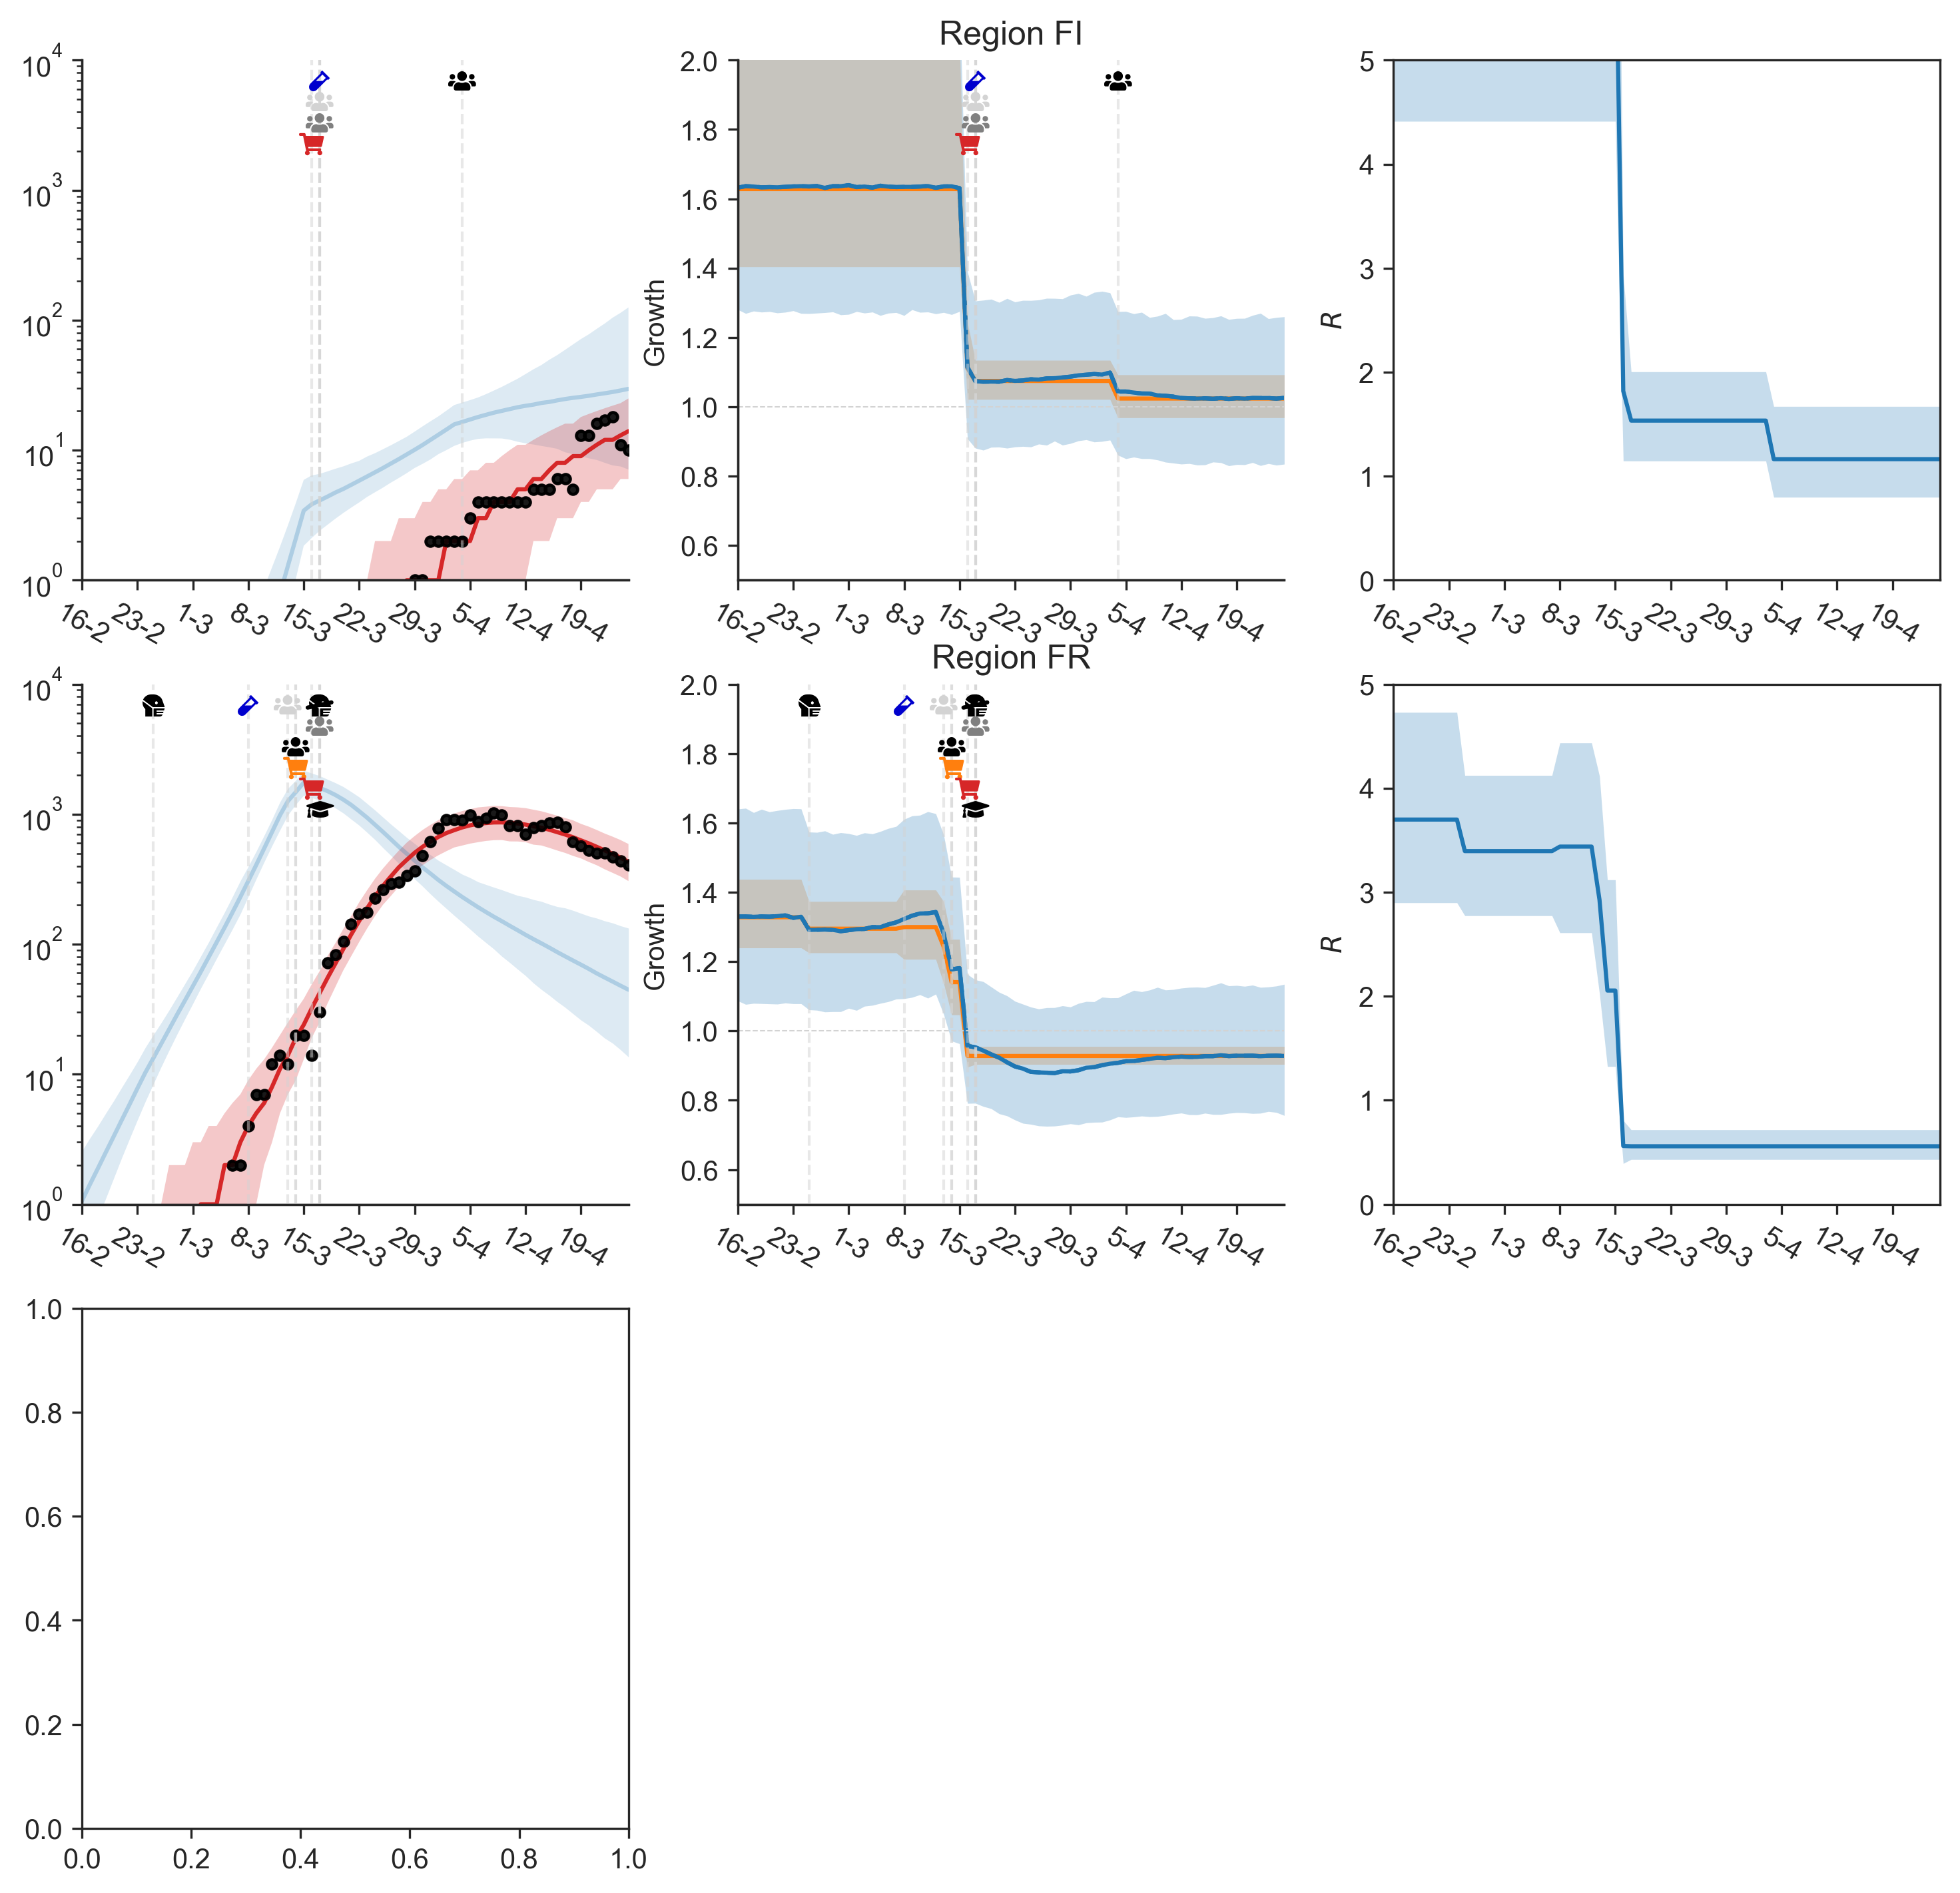

In [14]:
model.plot_region_predictions(model.cm_plot_style)

200.0


INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 23-05;16-14
INFO:epimodel.pymc3_models.cm_effect.models:Saving Plot at /Users/mrinank/workspace/epidemicforecasting/epimodel/notebooks/final_data/out at 23-05;16-14


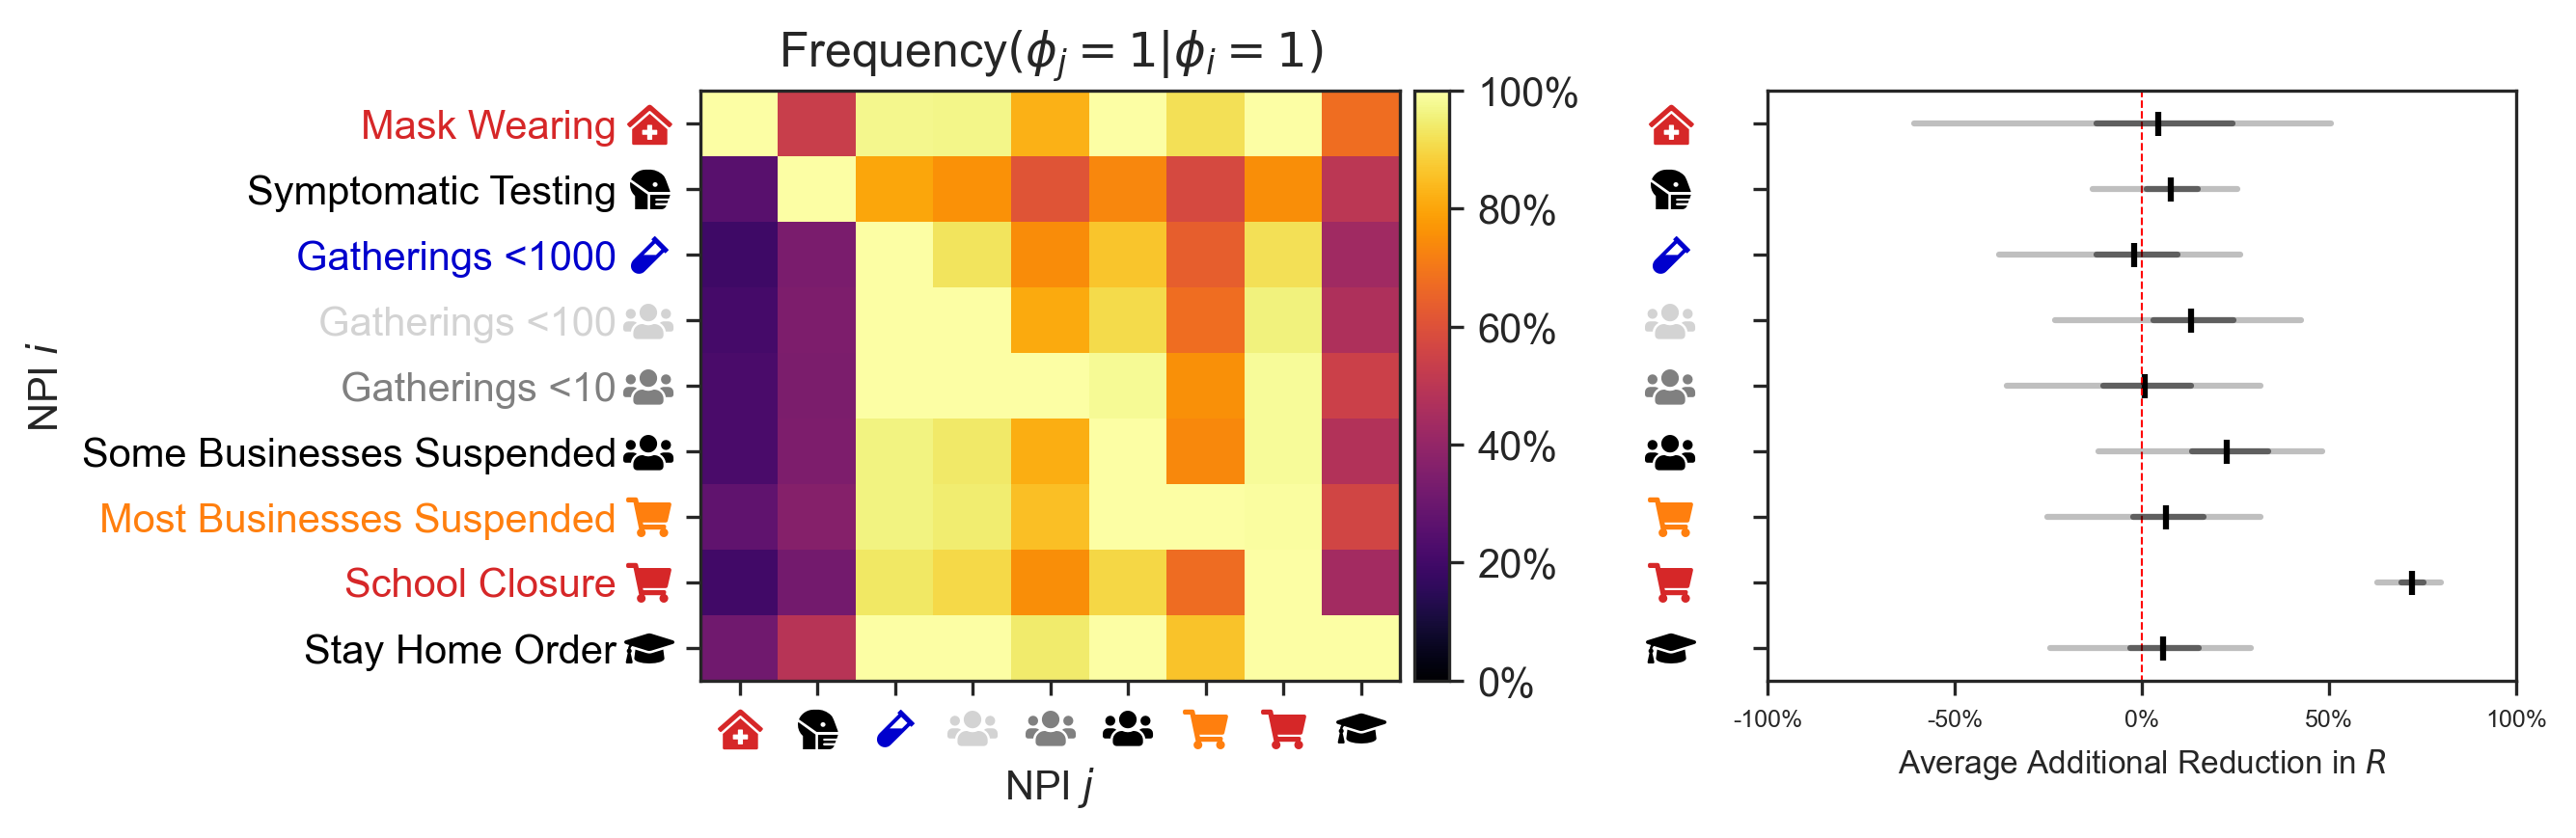

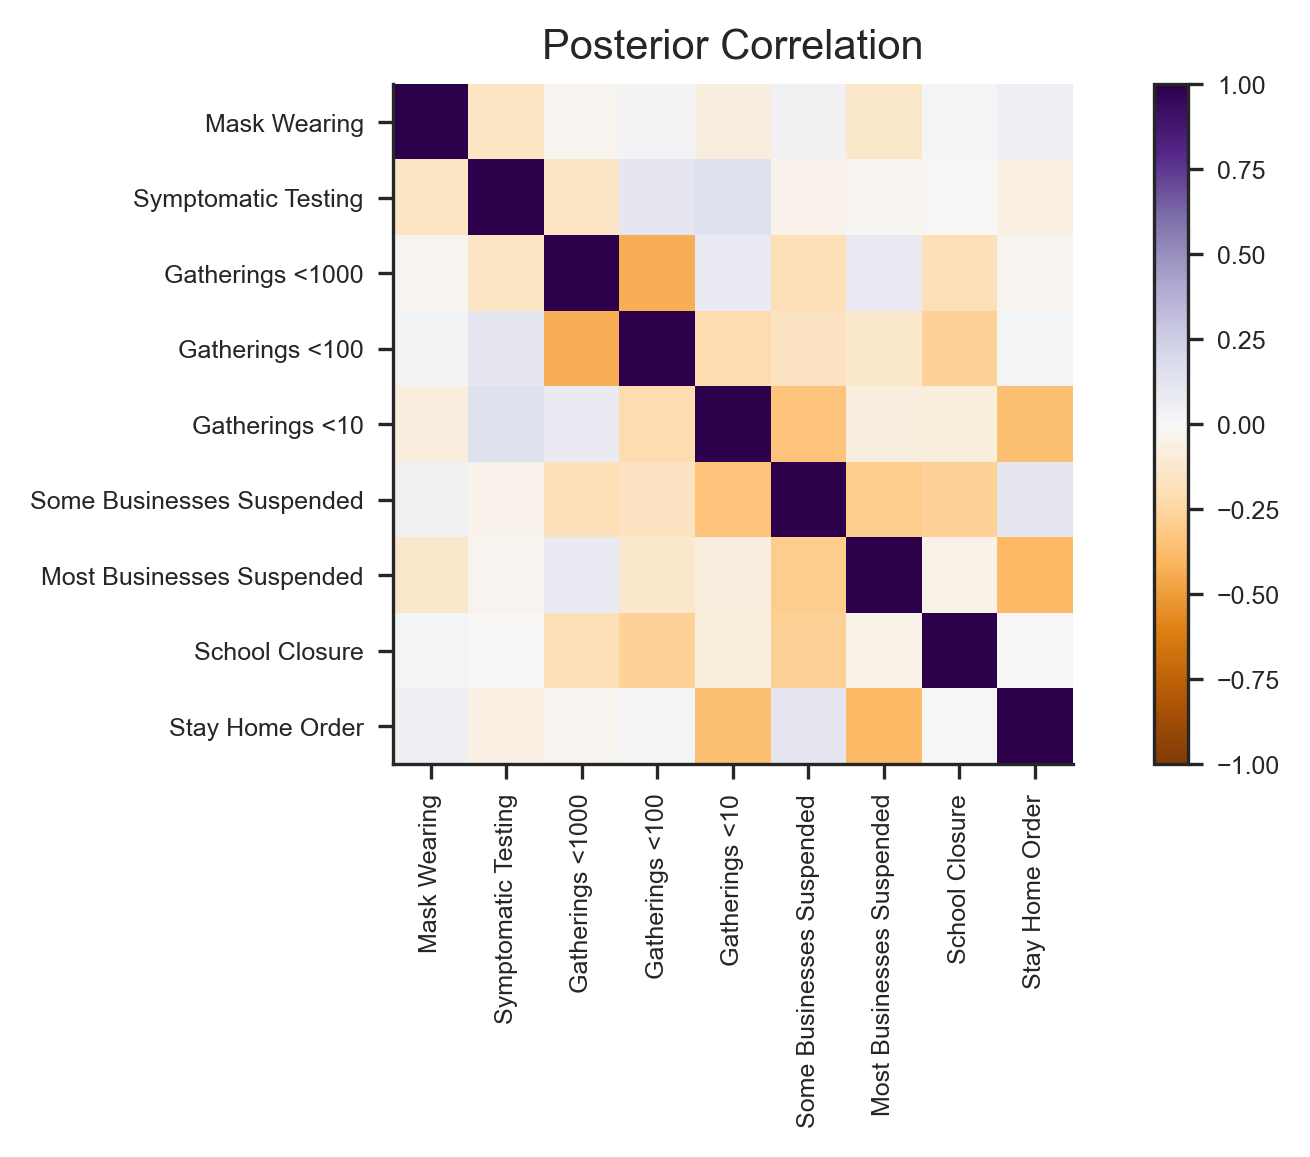

In [10]:
model.plot_effect()

In [ ]:
dp = DataPreprocessor()
data = dp.preprocess_data("data_final.csv")

with cm_effect.models.CMDeath_Final(data) as model2:
    model2.build_model()

with model2.model:
    model2.trace = pm.sample(2000, chains=4, target_accept=0.95)
    
np.savetxt("death2205_full.txt", model.trace["CMReduction"])

In [ ]:
np.savetxt("death2205_full.txt", model2.trace["CMReduction"])

In [ ]:
dp = DataPreprocessor()
data = dp.preprocess_data("data_final.csv")

data.ignore_early_features()

with cm_effect.models.CMDeath_Final(data) as model3:
    model3.build_model()

with model3.model:
    model3.trace = pm.sample(2000, chains=4, target_accept=0.95)
    
np.savetxt("death2205_fullalt.txt", model.trace["CMReduction"])

In [ ]:
model.plot_region_predictions(model.cm_plot_style)

In [ ]:
model.plot_effect()

In [ ]:
data.ignore_feature(0)
data.filter_region_min_deaths()

In [ ]:
data.summary_plot(model.cm_plot_style)

In [ ]:
with cm_effect.models.CMDeath_Final(data) as model:
    model.build_model()

In [ ]:
with model.model:
    model.trace = pm.sample(2000, chains=4, target_accept=0.95)

In [ ]:
model.plot_effect()

In [ ]:
for r_i, region in enumerate(data.Rs):
    if data.ActiveCMs[r_i, 1, -1] == 1:
        print(f"region {region} has {data.Deaths[r_i, -1]} deaths at theend and masks on at the end with {np.sum(data.ActiveCMs[r_i, 1, :])} days of masks")

In [ ]:
cm_plot_style = [
            ("\uf7f2", "tab:red"), # hospital symbol
            ("\uf963", "black"), # mask
            ("\uf492", "mediumblue"), # vial
            ("\uf0c0", "lightgrey"), # ppl
            ("\uf0c0", "grey"), # ppl
            ("\uf0c0", "black"), # ppl
            ("\uf07a", "tab:orange"), # shop 1
            ("\uf07a", "tab:red"), # shop2 
            ("\uf19d", "black"), # school
            ("\uf965", "black") # home
        ]

model.plot_region_predictions(cm_plot_style)

In [ ]:
pm.backends.text.dump("death_model", model.trace)

In [ ]:
model.trace

In [ ]:
import pickle
pickle.dump(model.trace, open("death.pkl", "wb" ) )